In [1]:
import pandas as pd 
import numpy as np

fields = [0,3]
df = pd.read_csv("access_log", sep=" ",  error_bad_lines=False, usecols=fields)
# Preview the first 5 lines of the loaded data 


In [2]:
df.head()

,10.223.157.186,[15/Jul/2009:14:58:59
0,10.223.157.186,[15/Jul/2009:14:58:59
1,10.223.157.186,[15/Jul/2009:15:50:35
2,10.223.157.186,[15/Jul/2009:15:50:35
3,10.223.157.186,[15/Jul/2009:15:50:35
4,10.223.157.186,[15/Jul/2009:15:50:35


In [3]:
df.columns=["IP", "Time"]
df.Time = df.Time.str.strip('[')

print(df.head())

               IP                  Time
0  10.223.157.186  15/Jul/2009:14:58:59
1  10.223.157.186  15/Jul/2009:15:50:35
2  10.223.157.186  15/Jul/2009:15:50:35
3  10.223.157.186  15/Jul/2009:15:50:35
4  10.223.157.186  15/Jul/2009:15:50:35


In [4]:
df.Time = pd.to_datetime(df.Time, format='%d/%b/%Y:%H:%M:%S', errors ='coerce')

In [5]:
df

,IP,Time
0,10.223.157.186,2009-07-15 14:58:59
1,10.223.157.186,2009-07-15 15:50:35
2,10.223.157.186,2009-07-15 15:50:35
3,10.223.157.186,2009-07-15 15:50:35
4,10.223.157.186,2009-07-15 15:50:35
...,...,...
4477837,10.190.174.142,2011-12-03 13:28:09
4477838,10.190.174.142,2011-12-03 13:28:10
4477839,10.190.174.142,2011-12-03 13:28:11
4477840,10.190.174.142,2011-12-03 13:28:10


In [6]:
result = df.groupby(pd.Grouper(key='Time', freq='M')).count()

In [7]:
result

,IP
Time,
2009-07-31,1252
2009-08-31,3798
2009-09-30,2696
2009-10-31,7347
2009-11-30,19211
2009-12-31,15911
2010-01-31,100120
2010-02-28,113089
2010-03-31,144044


In [9]:
result = result.iloc[:-1]
result

,IP
Time,
2009-07-31,1252
2009-08-31,3798
2009-09-30,2696
2009-10-31,7347
2009-11-30,19211
2009-12-31,15911
2010-01-31,100120
2010-02-28,113089
2010-03-31,144044


In [10]:
result.IP.array

<PandasArray>
[  1252,   3798,   2696,   7347,  19211,  15911, 100120, 113089, 144044,
 106716, 124169, 148563, 197091, 177332, 144625, 140729, 163713, 152237,
 172976, 237796, 316213, 194735, 215382, 237513, 247309, 289134, 283206,
 263381]
Length: 28, dtype: int64

In [11]:
import statsmodels.api as sm
import datetime

X = result.IP.index.map(datetime.datetime.toordinal)
y = result.IP


In [14]:
X

Int64Index([733619, 733650, 733680, 733711, 733741, 733772, 733803, 733831,
            733862, 733892, 733923, 733953, 733984, 734015, 734045, 734076,
            734106, 734137, 734168, 734196, 734227, 734257, 734288, 734318,
            734349, 734380, 734410, 734441],
           dtype='int64', name='Time')

In [ ]:
X = sm.add_constant(X)

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

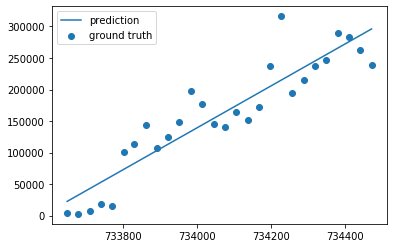

In [106]:
import matplotlib.pyplot as plt

plt.scatter(X[:,1],y, label="ground truth")
plt.plot(X[:,1],predictions, label="prediction")
plt.legend()
plt.show()

array([733650., 733680., 733711., 733741., 733772., 733803., 733831.,
       733862., 733892., 733923., 733953., 733984., 734015., 734045.,
       734076., 734106., 734137., 734168., 734196., 734227., 734257.,
       734288., 734318., 734349., 734380., 734410., 734441., 734471.])